# FCS Tutoring Session 8

Welcome to our eight exercise session. Started last week with data wrangling of football data we will continue this journey today.

I was looking for a free API from which we can query current and accurate stats data from football players. Unfortunately, I did not find one.
As a solution, I just create one by myself, which just gives back some data in JSON format about a few football players: 

`https://example-data-football.herokuapp.com/getPlayerData`

Our goal is to first integrate this data and then wrangle around a bit with the data by cleaning and transforming the data.

For any questions please contact me on Slack.

Janick Spirig, 22.04.2021

In [86]:
import os
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

## Load data from API

The first task is to load the data from the API. As you have learnt previously we can use the `requests` library for this task which we just imported in the cell above.


---

The result from the API for each footballplayer will look like this (JSON): 

`["defender", 89, 35, false, "Sergio Ramos", "Male"]`

The values are ordered as:
*   Player Position
*   Fifa rating
*   Age
*   is_striker?
*   Gender


If we want to represent each player as a python object, we first need to define the class, then load the data and finally create the python objects.

In [87]:
# define here the class Footballplayer
class Footballplayer:
  def __init__(self, datalist):
    self.position = datalist[0]
    self.rating = datalist[1]
    self.age = datalist[2]
    self.is_striker = datalist[3]
    self.name = datalist[4]
    self.gender = datalist[5]

In [88]:
def loadData():
    """
    Load the data from the example API and creates for each football player a Football Player object.

    :return: A list with all Footballplayers represented as python objects
    """


In [89]:
footballplayers = loadData()

## Data wrangling

In [90]:
def create_footballplayer_list(footballplayers):
    """
    Takes a list of Player objects and creates tuples containing the information of each Footballplayer, then returns them.
    The tuple format is (name, position, rating, age, is_striker, gender).

    :param football_players: A list of Footballplayer objects.
    :return: A list of tuples, where each tuple represents the data of one player
    """

In [91]:
player_lst = create_footballplayer_list(footballplayers)

In [92]:
def create_footballplayer_df(footballplayers):
    """
    Takes a list of Footballplayer objects as tuples and creates a DataFrame containing the footballplayer data.
    It should have the following columns in the same exact order:
        Name, Position, Rating, Age, Is Striker?

    :param footballplayers: A list of tuples in the format
    :return: A DataFrame containing the data from "footballplayers" with the correct columns as specified.
    """

In [93]:
player_df = create_footballplayer_df(player_lst)

In [26]:
def get_footballplayer_df_dtypes(df):
    """
    Takes a DataFrame containing the footballplayer data and creates a dictionary mapping the label of each column
    to its dtype.

    :param df: The DataFrame containing the footballplayer data.
    :return: A dictionary mapping the label (name) of each column of the DataFrame to the dtype of the column.
    """

In [ ]:
get_footballplayer_df_dtypes(player_df)

# what means dtype('O'), dtype('int64') etc.? https://pbpython.com/pandas_dtypes.html

In [28]:
def replace_gender_values(df):
    """
    Replaces the values in the gender column in the DataFrame.
      "Male" -> "m"
      "Female" -> "female

    HINT: Use the apply function.

    :param df: The DataFrame.
    :return: Nothing - performs the replacement in-place.
    """

In [29]:
replace_gender_values(player_df)

In [30]:
def replace_none_values_in_column(df, column, values):
    """
    Replaces all None values in a column of a DataFrame.

    :param df: The DataFrame.
    :param column: The column that has None values.
    :param values: The values that are being used to replace the None values.
    :return: Nothing - performs the replacement in-place.

    HINTS:
    - You can assume that the number of None values is always equal to len(values). That means you always get the
        exactly right amount of values.
    - Start by figuring out how to find the None values!
    - Use this information to select the rows where this condition holds
    - You only want to replace values in one column - find a way to select only this one column from the relevant rows
    - Lastly you can update the row values in this one column. You find the replacement values in the variable "values"
    """

In [ ]:
replace_none_values_in_column(player_df, "Position", ["defender", "striker"])

In [33]:
def drop_column(df, column):
    """
    Drops a column from a DataFrame.

    :param df: The DataFrame.
    :param column: The column to be dropped.
    :return: The DataFrame without the unwanted column.
    """


In [ ]:
player_df = drop_column(player_df, 'Is Striker?')
player_df

In [35]:
def change_column_order(df, new_order):
    """
    Applies new column order to a DataFrame.

    :param new_order: A list of the column labels in the new order.
    :return: The DataFrame wiht the columns in new order.
    """

In [ ]:
player_df = change_column_order(player_df, ['Name', 'Rating','Age', 'Position', 'Gender'])
player_df

In [37]:
def create_stats_df(stats, footballplayers):
    """
    Takes a list of stats tuples and a dataframe of footballplayer objects and creates a DataFrame containing the footballplayer stats.
    Each tuple in the stats list belongs to a footballplayer -> the first tuple belongs to the first footballplayer in the list etc.
    
    It should have the following columns in the same exact order:
        Name, 2017/2018, 2018/2019, 2019/2020

    :param stats: A list of tuples which each tuple containing three integer values.
    :param footballplayers: A dataframe containing the footballplayers
    :return: A DataFrame containing the name from "footballplayers" and his stats with the correct columns as specified.
    """


In [ ]:
stats = [
         (10,8,12),
         (15,12,5),
         (2,5,1),
         (25,17,23),
         (40,45,51),
         (0,0,0),
         (4,6,2),
         (10,12,16),
         (30,25,27),
         (0,0,0),
         (11,21,18),
         (8,25,23),
         (2,4,3),
         ]

stats_df = create_stats_df(stats, player_df)
stats_df

In [ ]:
player_df

In [40]:
def add_more_players(df, players):
    """
    Takes a list of dictionaries where each dictionary represents a a new player and adds them to the DataFrame df.
    You must not check whether the number of columns in df is the same as the number of elements in the players tuple. Just add each player as new row to the DataFrame.

    :param players: A list of tuples which each tuple representing a player
    :param df: A DataFrame to which all the players should be added.
    :return: The updated DataFrame
    """

In [41]:
new_players = [{
    'Name':'Cristiano Ronaldo',
    '2019/2020'	: 40,
    '2017/2018' : 50,
    '2018/2019' : 42
  },
  {
    'Name':'Neymar',
    '2019/2020'	: 35,
    '2017/2018' : 22,
    '2018/2019' : 24
  }]

stats_df = add_more_players(stats_df, new_players)

new_players = [{
    'Name':'Heu-Ming Son',
    'Rating': 87,
    'Age' : 27,
    'Position' : 'midfielder',
    'Gender': 'm'
  },
  {
    'Name':'Denis Zakaria',
    'Rating': 86,
    'Age' : 23,
    'Position' : 'midfielder',
    'Gender' : 'm'
  }]

player_df = add_more_players(player_df, new_players)

In [ ]:
player_df

In [ ]:
stats_df

In [44]:
def merge_dfs(df1, df2, index, how):
    """
    Merges two DataFrames.

    :param df1: The first DataFrame.
    :param df2: The second DataFrame.
    :param index: Which column to use as index.
    :param how: How the merging should be performed.
    :return: The merge of the DataFrame.
    """

In [ ]:
# just uncomment the print-statement below for any desired possibility of merge

# OUTER-merge: Take all rows of both dataframes
# print(merge_dfs(player_df, stats_df, "Name", "outer"))

# INNER-merge: Take all rows which match against the join-key
# print(merge_dfs(player_df, stats_df, "Name", "inner"))

# LEFT-merge: Take all rows from the left dataframe and those rows from the right dataframe which match against the join-key
#print(merge_dfs(player_df, stats_df, "Name", "left"))

# RIGHT-merge: Take all rows from the right dataframe and those rows from the left dataframe which match against the join-key
# print(merge_dfs(player_df, stats_df, "Name", "right"))

In [46]:
def add_mean(df, columns):
    """
    Adds a column "Mean" to a DataFrame and round the mean value to one digit.
    Each row should have a value in this column. The "Mean" for each row should be calculated over all values in that
    are in the columns from "columns".

    HINT: Be sure to specify the correct axis!

    :param df: The DataFrame.
    :param columns: The columns over which the mean should be calculated.
    :return: Nothing, add the column in-place.
    """

In [47]:
merged_df = merge_dfs(player_df, stats_df, "Name", "outer")
add_mean(merged_df, ['2017/2018', '2018/2019','2019/2020'])

In [48]:
# now sort the data frame in descending order based on the column Average Goals

In [ ]:
merged_df

## Visualization

Let's visualize the data in a bar chart. For each player we want to have two bars in the chart. One for the rating and another one for Average Goals.

In [84]:
def visualize(df):
    """
    Plots the columns Rating and Average Goals of all the players included in the df.

    For each of the two attributes every player should get one bar in the chart.

    Additionally:
        - use the player name for the x-axis
        - rotate the Name so it is readable from bottom to top
        - set the figure size to be 1000x700 pixels

    :param df: A dataframe containing the players data.
    """

In [ ]:
visualize(merged_df)

## Normalization

As a last task, we want to normalize the data in the columns `Rating` and `Average Goals`. Because right now the scales of these two attributes differ a lot and since we want to compare the players we are no interested in the absolute values. To normalize the values we can use the normalization formula below.

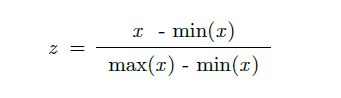

In [15]:
def normalize(series):
  """
  Normalizes the data of a Pandas Series and returns the noralized new series.

  :param series: The pandas series to be normalized, e.g. all values in a column of a DataFrame.

  Return the nromalized pandas Series
  """

In [58]:
merged_df['Rating'] = normalize(merged_df['Rating'])
merged_df['Average Goals'] = normalize(merged_df['Average Goals'])